<a href="https://colab.research.google.com/github/Suthakaran12/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRELIMINARY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium #creates a map in a separate HTML file

In [ ]:
url = "https://www.kaggle.com/datasets/anshultated/us-accidents-december-2021-cleaned"
df = pd.read_csv('/content/drive/MyDrive/PRODIGY_TASKS/US_Accidents_Dec21_Cleaned.csv')

EDA

In [ ]:
# Basic EDA
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0   ID  Severity           Start_Time             End_Time  \
0           0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1           4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
2           5  A-6         2  2016-02-08 08:16:57  2016-02-08 14:16:57   
3           6  A-7         2  2016-02-08 08:15:41  2016-02-08 14:15:41   
4           7  A-8         2  2016-02-08 11:51:46  2016-02-08 17:51:46   

   Start_Lat  Start_Lng  Distance(mi)  \
0  40.108910 -83.092860         3.230   
1  39.172393 -84.492792         0.500   
2  39.063240 -84.032430         1.427   
3  39.775650 -84.186030         0.227   
4  41.375310 -81.820170         0.521   

                                         Description          Street  ...  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...     Outerbelt E  ...   
1                 At Mitchell Ave/Exit 6 - Accident.          I-75 S  ...   
2                       At Dela Palma Rd - Accident.  State Route 32  ...   


DISTRIBUTIONS VISUALIZING

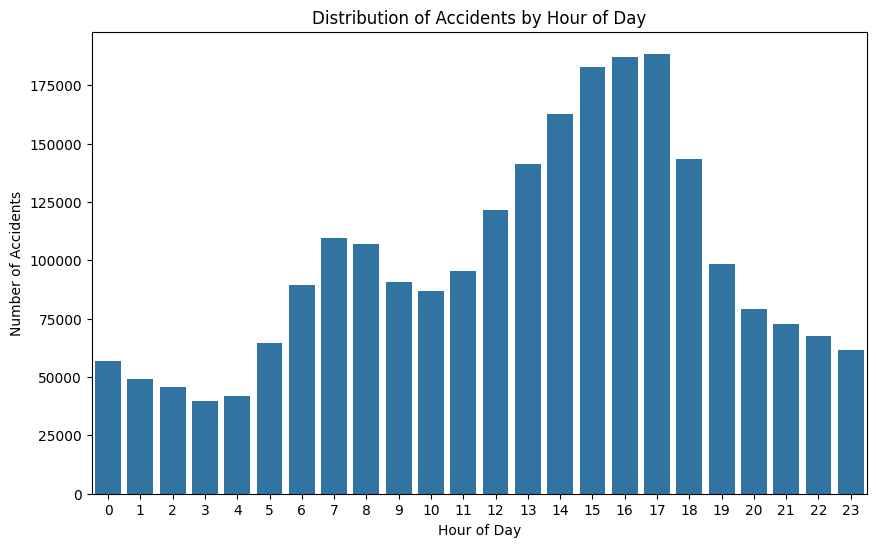

In [ ]:
# Visualizing the distribution of accidents by time of day
# Convert Start_Time to datetime, handling errors
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with NaT values in Start_Time
df = df.dropna(subset=['Start_Time'])

# Extract the hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Visualize the distribution of accidents by time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour')
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

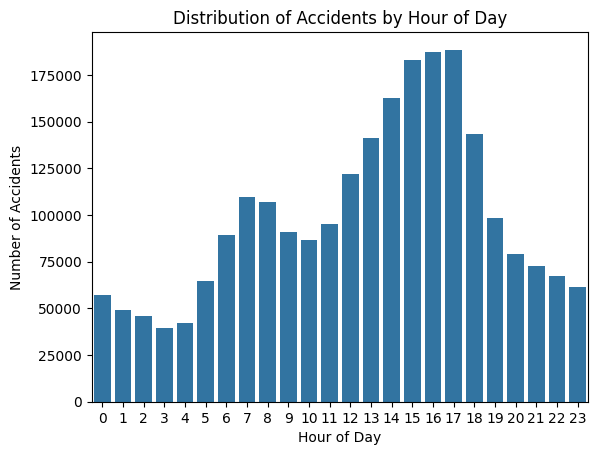

In [ ]:
# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Plot accidents by hour
sns.countplot(data=df, x='Hour')
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

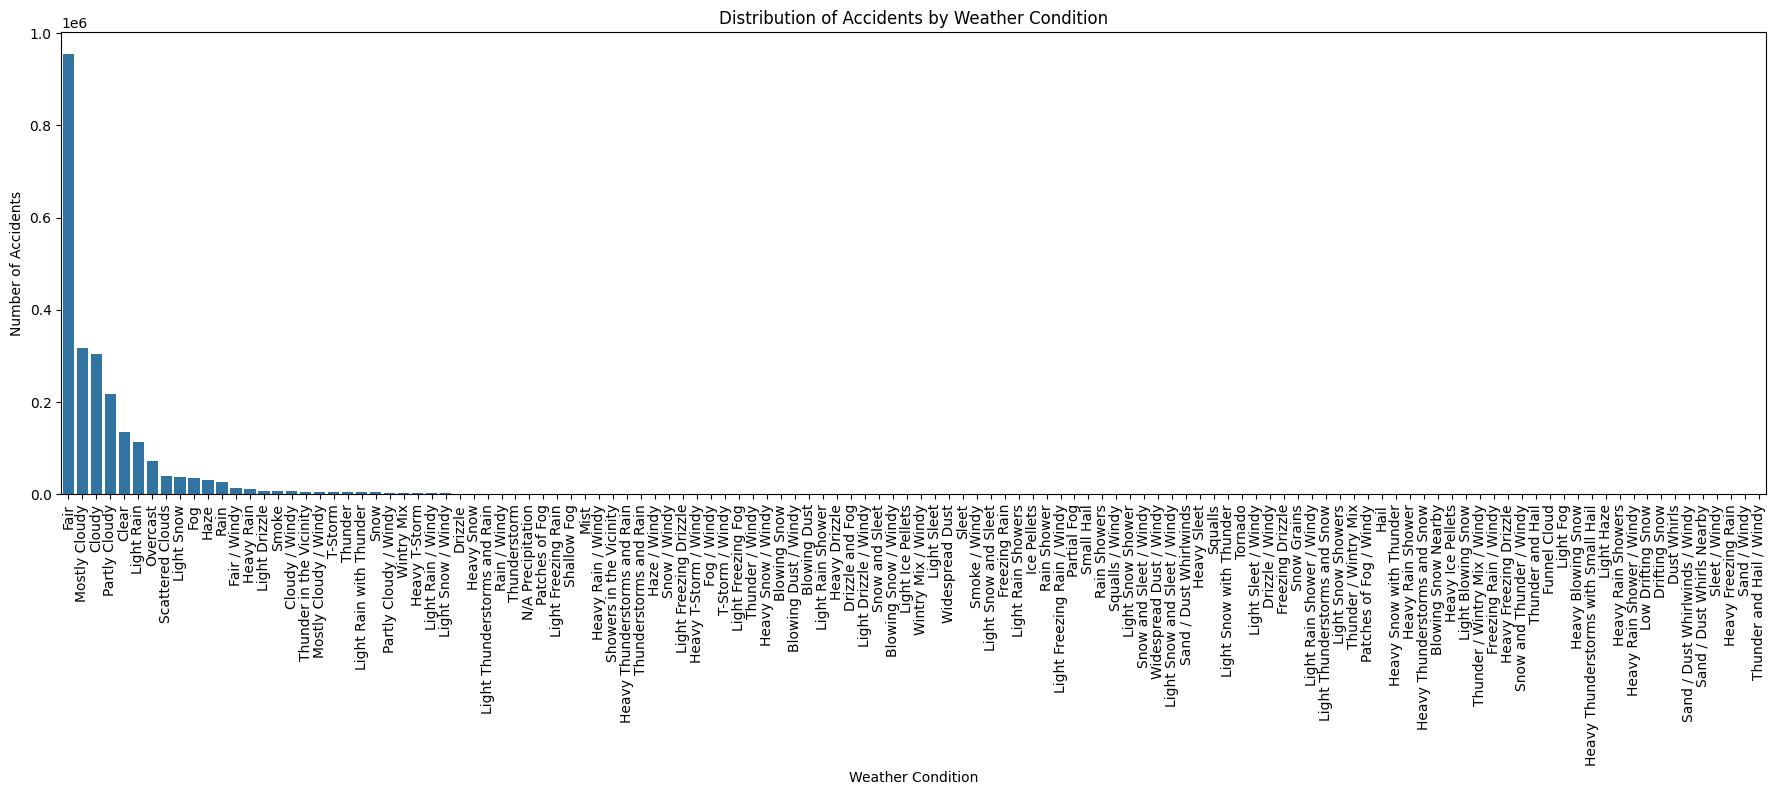

In [ ]:
# Plot accidents by weather condition
plt.figure(figsize=(22, 6))
sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().index)
plt.title('Distribution of Accidents by Weather Condition')
plt.xticks(rotation=90)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


FOLIUM HTML MAP VISUALIZING

In [ ]:
# Sample a subset of the data (e.g., 1000 rows)
sampled_df = df.sample(n=10000, random_state=42)

# Create a base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add accident locations to the map from the sampled data
for idx, row in sampled_df.iterrows():
    folium.CircleMarker(location=[row['Start_Lat'], row['Start_Lng']], radius=1, color='red').add_to(m)

# Save map
m.save('accident_hotspots.html')

In [ ]:
from folium.plugins import HeatMap

# Assuming df is your DataFrame containing accident data
# Limiting to 10000 rows
df_subset = df.head(10000)

# Create a heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df_subset.iterrows()]
m = folium.Map()  # Initialize your map object

HeatMap(heat_data).add_to(m)

# Save heatmap
m.save('accident_heatmap.html')


CORRELATION

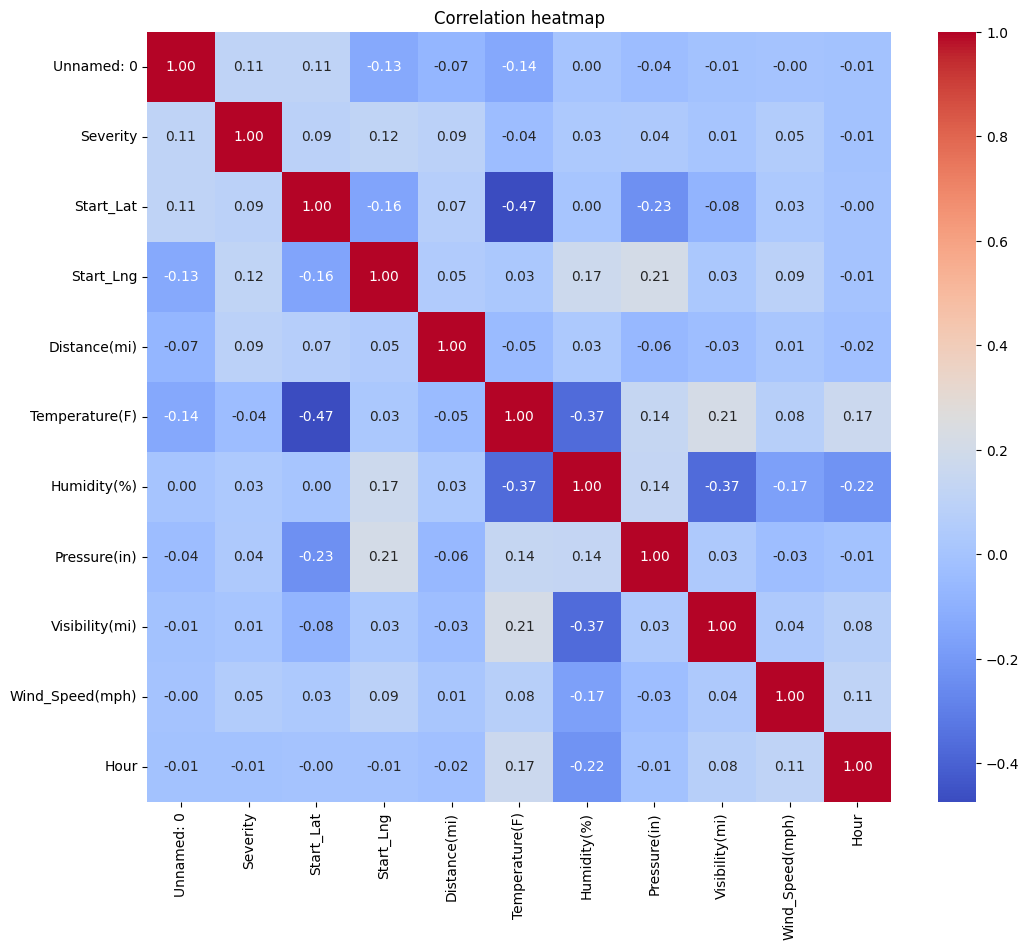

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

MORE DISTRIBUTION VISUALIZING

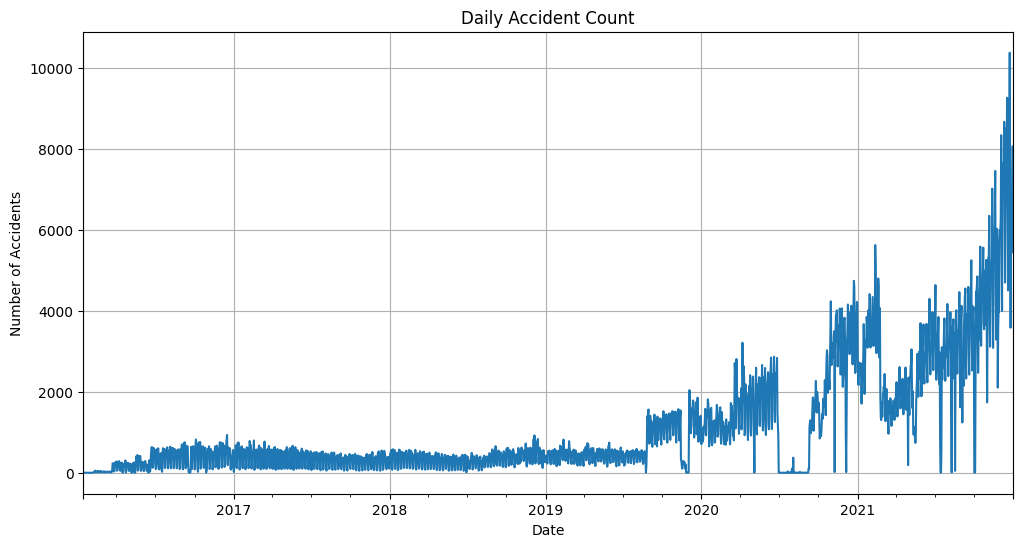

In [ ]:
# Convert 'Start_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Set 'Start_Time' as the index
df.set_index('Start_Time', inplace=True)

# Resample data by day
daily_accidents = df.resample('D').size()

# Plot time series
plt.figure(figsize=(12, 6))
daily_accidents.plot()
plt.title('Daily Accident Count')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

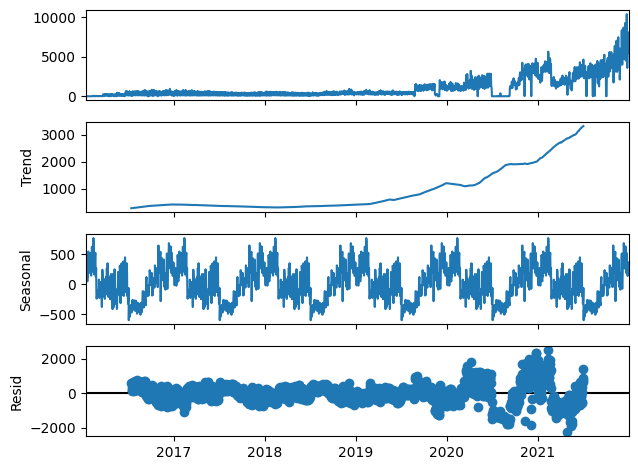

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series
result = seasonal_decompose(daily_accidents, model='additive', period=365)
result.plot()
plt.show()

**The t-statistic measures the size of the difference relative to the variation in your sample data AND p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is true.**

In [ ]:
from scipy.stats import ttest_ind

# Separate data into two groups based on weather conditions
good_weather = df[df['Weather_Condition'] == 'Clear']
bad_weather = df[df['Weather_Condition'] == 'Rain']

# T-test
t_stat, p_val = ttest_ind(good_weather['Severity'], bad_weather['Severity'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 66.97743314413543, P-value: 0.0


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
X = df[features]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2278318046539276


**KMEANS CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


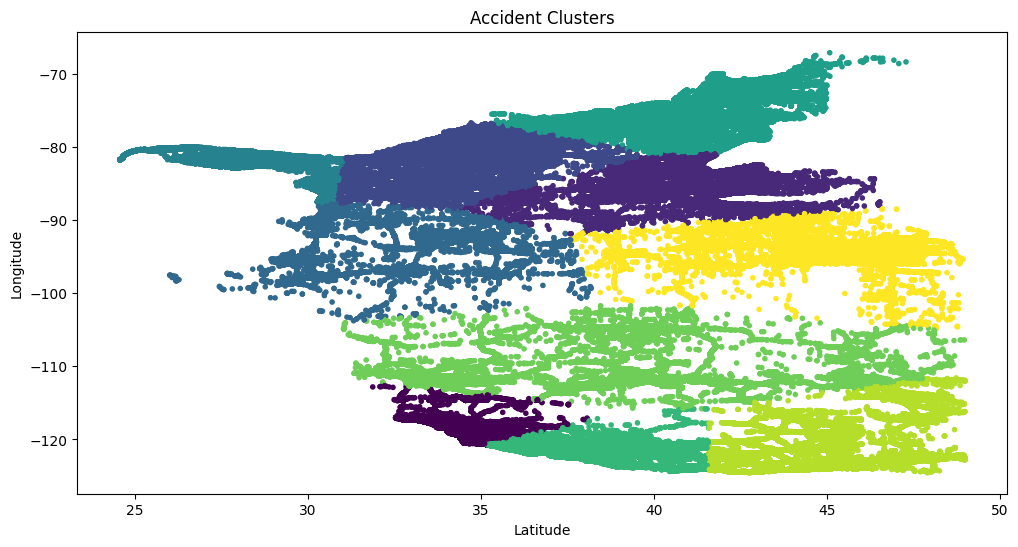

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Select geographical features
X = df[['Start_Lat', 'Start_Lng']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['Start_Lat'], df['Start_Lng'], c=df['Cluster'], cmap='viridis', marker='.')
plt.title('Accident Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


**RANDOM FOREST, KFOLD, PERFROMANCE METRICS AND CROSS VALIDATION FOR FIRST 10000 ROWS**

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Select features (adjust as per your needs)
features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
target = 'Severity'
df2=df.head(10000)
# Drop rows with missing values in selected features and target
df2 = df2.dropna(subset=features + [target])

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define cross-validation strategy (e.g., 5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics (accuracy, precision, recall, F1-score)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, df2[features], df2[target], cv=cv, scoring=scoring)

# Print results
print(f'Accuracy: {cv_results["test_accuracy"].mean():.2f} +/- {cv_results["test_accuracy"].std():.2f}')
print(f'Precision: {cv_results["test_precision"].mean():.2f} +/- {cv_results["test_precision"].std():.2f}')
print(f'Recall: {cv_results["test_recall"].mean():.2f} +/- {cv_results["test_recall"].std():.2f}')
print(f'F1-score: {cv_results["test_f1_score"].mean():.2f} +/- {cv_results["test_f1_score"].std():.2f}')


Accuracy: 0.81 +/- 0.01
Precision: 0.77 +/- 0.01
Recall: 0.81 +/- 0.01
F1-score: 0.79 +/- 0.01


**LINEAR REGRESSION HYPOTHESIS ERROR EVALUATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], test_size=0.3, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 0.35
Mean Squared Error (MSE): 0.26
R-squared (R2): 0.07
